In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2024-06-04 02:48:52--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /scl/fi/ied22o8pntppl24qr84vy/dataset.zip?rlkey=9e4cnwq83zhgrhw1g0zrkw275&dl=0 [following]
--2024-06-04 02:48:53--  https://www.dropbox.com/scl/fi/ied22o8pntppl24qr84vy/dataset.zip?rlkey=9e4cnwq83zhgrhw1g0zrkw275&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucac41e0f2f82145f31c8d3ca4c6.dl.dropboxusercontent.com/cd/0/inline/CUKBW4nJYU7UzaM4WnnUcj-YrztO9np1fmztaQrHNcCXkCwQTi4d0ozy640MT2CB5kLURQoTNPYpXzB2QQo43AOxKT4s1A8uUebvhdCJbrvScysJ00pJku6ibRb3MiC8rK_mvPyw1MFTTDH_4c1E7YNO/file# [following]
--2024-06-04 02:48:54--  https://ucac41e0f2f82145f31c8d3ca4c6.dl.dropboxusercontent.com/cd/0/inline/CUKBW4nJYU

In [ ]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

In [ ]:
#Building model to train the data
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [ ]:
#Preparing our data using data generator
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


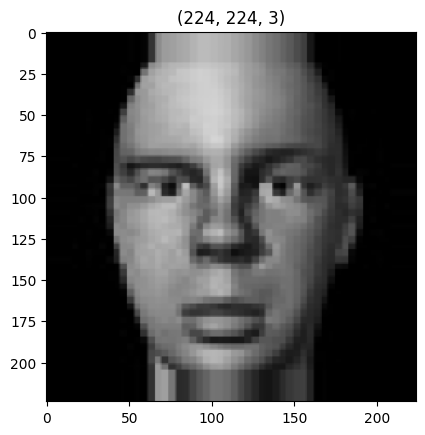

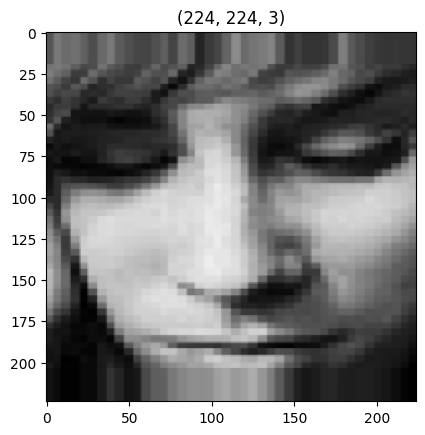

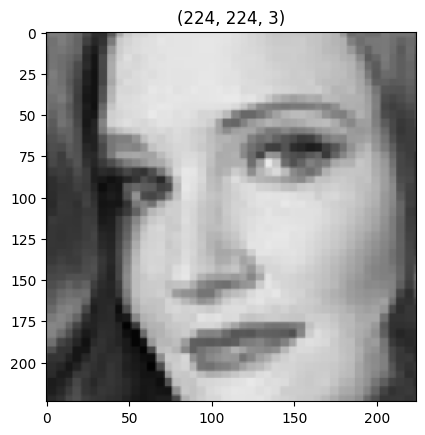

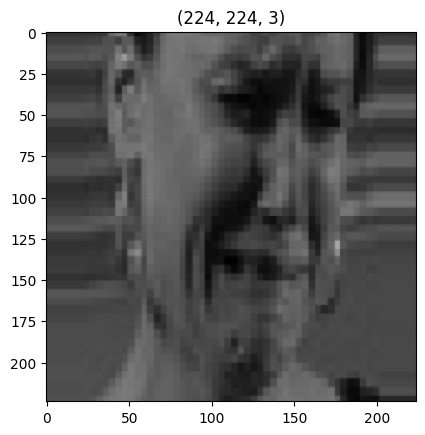

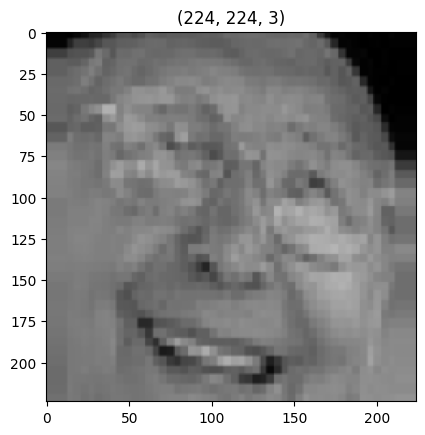

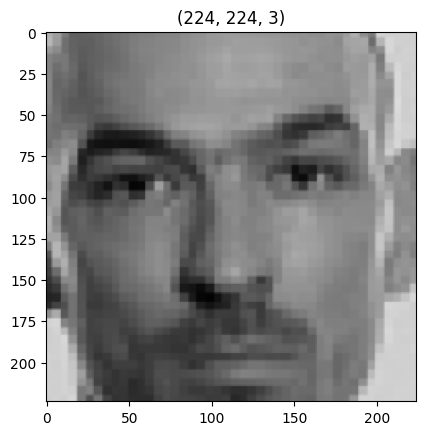

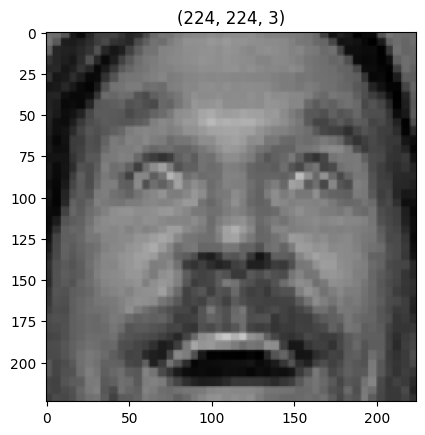

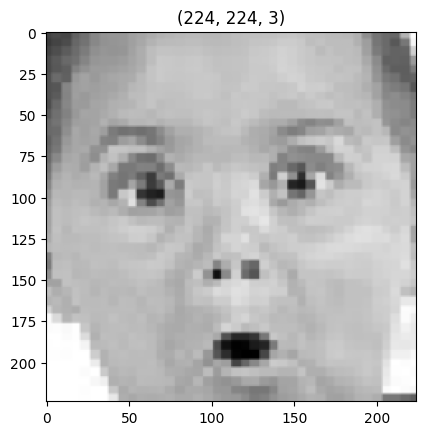

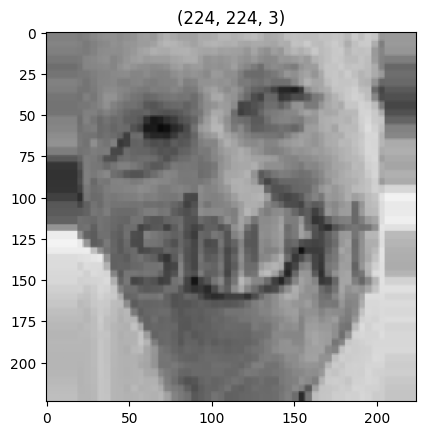

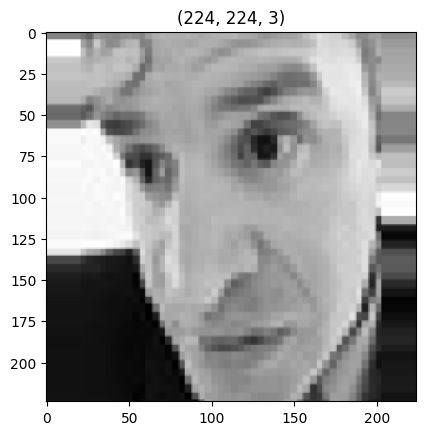

In [ ]:
#Visualizing the data that is fed to data generator
# to visualize the images in the traing data denerator

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

In [ ]:
#Having early stopping and model check point
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

<ipython-input-11-f681b3c69731>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 16.6729 - accuracy: 0.2062
Epoch 1: val_accuracy improved from -inf to 0.29688, saving model to best_model.h5
10/10 [==============================] - 40s 4s/step - loss: 16.6729 - accuracy: 0.2062 - val_loss: 17.4487 - val_accuracy: 0.2969


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 18.9348 - accuracy: 0.3344
Epoch 2: val_accuracy did not improve from 0.29688
10/10 [==============================] - 28s 3s/step - loss: 18.9348 - accuracy: 0.3344 - val_loss: 16.8107 - val_accuracy: 0.2891
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 11.7416 - accuracy: 0.3469
Epoch 3: val_accuracy improved from 0.29688 to 0.37500, saving model to best_model.h5
10/10 [==============================] - 27s 3s/step - loss: 11.7416 - accuracy: 0.3469 - val_loss: 11.4474 - val_accuracy: 0.3750
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 8.4648 - accuracy: 0.3688
Epoch 4: val_accuracy improved from 0.37500 to 0.39062, saving model to best_model.h5
10/10 [==============================] - 37s 4s/step - loss: 8.4648 - accuracy: 0.3688 - val_loss: 7.9704 - val_accuracy: 0.3906
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 6.8383 - accuracy: 0.4344
Epoch 5:

In [ ]:

# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

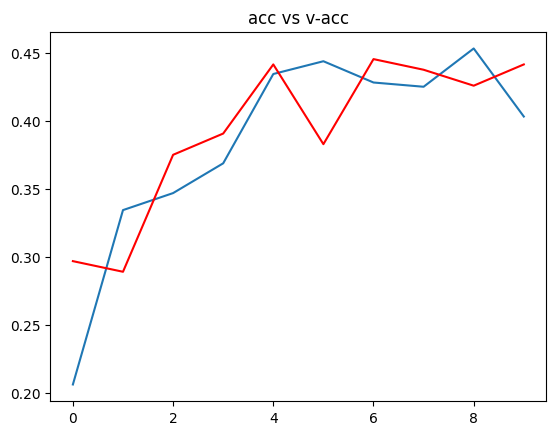

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

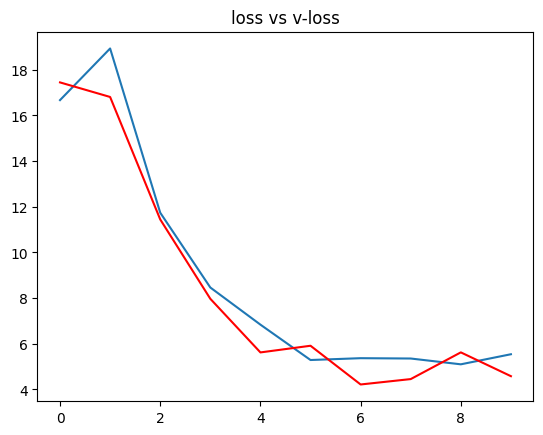

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 243ms/step
 the image is of happy


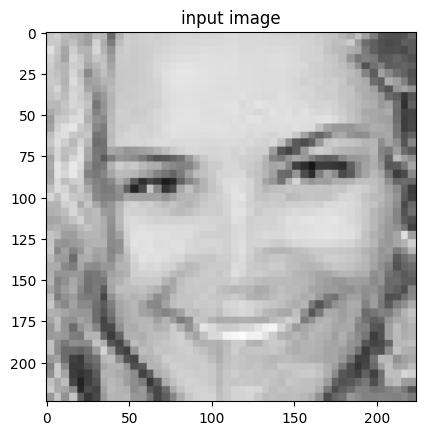

In [ ]:
# path for the image to see if it predics correct class

path = "/content/test/happy/PrivateTest_10077120.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

1/1 [==============================] - 0s 116ms/step
 the image is of neutral


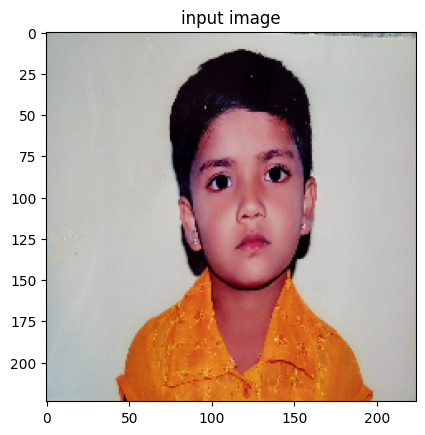

In [ ]:
path = "/content/Aish.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

1/1 [==============================] - 0s 132ms/step
 the image is of angry


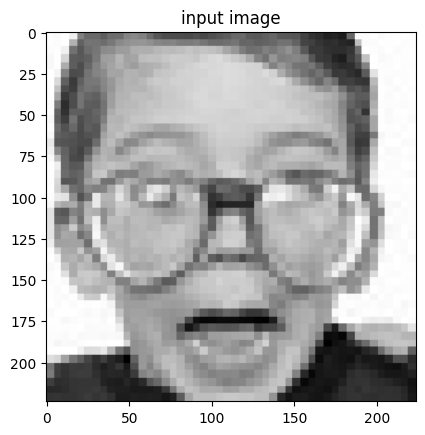

In [ ]:
path = "/content/test/angry/PrivateTest_1850005.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')  # Assuming 7 classes for emotions
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Assuming you have your training data and labels
# train_images, train_labels = ...

# Train the model
# model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
# test_images, test_labels = ...
# test_loss, test_acc = model.evaluate(test_images, test_labels)

# Save the model
model.save("new_model.h5")


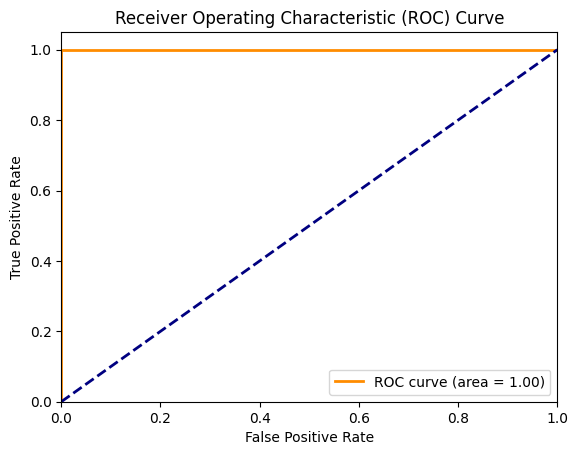

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
# Assuming y_true are the true labels and y_pred_proba are the predicted probabilities
y_true = [0, 1, 0, 1, 1]
y_pred_proba = [0.1, 0.9, 0.3, 0.8, 0.7]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
